In [1]:
# %load_ext jupyternotify
import numpy as np
import pandas as pd
import matplotlib
import math
from sklearn import model_selection, ensemble, metrics, linear_model, preprocessing, pipeline
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
pd.set_option('display.max_rows', None)

In [111]:
pd.set_option('display.max_rows', 10)

In [2]:
data = pd.read_csv('dataset/undp_train.csv', na_values='nan')
test = pd.read_csv('dataset/undp_test.csv', na_values='nan')

In [3]:
idx = pd.IndexSlice

In [4]:
data_ind = data.set_index(['year', 'country'])
test_ind = test.set_index(['year', 'country'])

In [18]:
list(enumerate(data_ind.columns))

[(0, 'Life expectancy Index'),
 (1, 'Life expectancy at birth'),
 (2, 'Gross national income (GNI) per capita (2011 PPP$)'),
 (3, 'Income Index'),
 (4, 'Expected years of schooling (years)'),
 (5, 'Mean years of schooling (years)'),
 (6, 'Human Development Index (HDI)'),
 (7, 'Education Index'),
 (8, 'Population using at least basic drinking-water services (%)'),
 (9, 'Population using at least basic sanitation services (%)'),
 (10, 'Gross capital formation (% of GDP)'),
 (11, 'Population, total (millions)'),
 (12, 'Population, urban (%)'),
 (13, 'Mortality rate, under-five (per 1,000 live births)'),
 (14, 'Mortality rate, infant (per 1,000 live births)'),
 (15,
  'Old age dependency ratio (old age (65 and older) per 100 people (ages 15-64))'),
 (16, 'Population ages 15–64 (millions)'),
 (17, 'Population, ages 65 and older (millions)'),
 (18, 'Life expectancy at birth, male (years)'),
 (19, 'Life expectancy at birth, female (years)'),
 (20, 'Population, under age 5 (millions)'),
 (21, 

In [143]:
data_ind.groupby(level=0)['y'].count()

year
1990    181
1991    180
1992    180
1993    180
1994    180
1995    180
1996    180
1997    180
1998    180
1999    180
2000    180
2001    180
2002    180
2003    180
2004    180
2005    180
2006    180
2007     90
2008     90
2009     90
2010     90
2011     90
2012     90
2013     89
2014     88
2015     87
Name: y, dtype: int64

In [144]:
index_columns = ['year',
                 'country',
                 'Life expectancy Index',
                 'Income Index',
                 'Human Development Index (HDI)',
                 'HDI Rank',
                 'Education Index',
                 'Gender Development Index (GDI)',
                 'Gender Inequality Index (GII)',
                 'Population using at least basic drinking-water services (%)',
                 'Population using at least basic sanitation services (%)',
                 'Old age dependency ratio (old age (65 and older) per 100 people (ages 15-64))',
                 'Gross capital formation (% of GDP)',
                 'y'
                ]

In [140]:
full = data.append(test, ignore_index=True)

In [141]:
full

,year,country,Life expectancy Index,Life expectancy at birth,Gross national income (GNI) per capita (2011 PPP$),Income Index,Expected years of schooling (years),Mean years of schooling (years),Human Development Index (HDI),Education Index,...,Current health expenditure (% of GDP),"Human Development Index (HDI), female","Human Development Index (HDI), male",Gender Development Index (GDI),Adjusted net savings (% of GNI),"HIV prevalence, adult (% ages 15-49), total",Private capital flows (% of GDP),Gender Inequality Index (GII),HDI Rank,y
0,1990,Afghanistan,0.467,50.3,2193.0,0.466,2.6,1.5,0.298,0.122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.0,0.050220
1,1990,Albania,0.797,71.8,4415.0,0.572,11.6,7.8,0.644,0.584,...,NaN,NaN,NaN,NaN,2.3,0.1,NaN,NaN,63.0,0.082286
2,1990,Algeria,0.722,66.9,9989.0,0.695,9.6,3.6,0.578,0.385,...,NaN,NaN,NaN,NaN,9.0,0.1,NaN,NaN,89.0,0.064073
3,1990,Angola,0.389,45.3,4139.0,0.562,3.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.2,NaN,NaN,NaN,0.049559
4,1990,Argentina,0.794,71.6,10932.0,0.709,13.2,7.9,0.707,0.628,...,NaN,NaN,NaN,NaN,6.6,0.1,-0.4,NaN,43.0,0.074967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,2016,Yemen,0.709,66.1,1966.0,0.450,8.7,3.0,0.477,0.341,...,5.6,0.289,0.550,0.525,NaN,NaN,NaN,0.837,173.0,NaN
4751,2016,Vanuatu,0.770,70.0,2751.0,0.501,11.4,6.7,0.592,0.540,...,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.0,NaN
4752,2016,Uruguay,0.885,77.5,19196.0,0.794,16.3,8.7,0.806,0.745,...,9.1,0.805,0.793,1.016,10.4,0.6,6.0,0.286,58.0,NaN
4753,2016,Viet Nam,0.849,75.2,5638.0,0.609,12.7,8.1,0.685,0.621,...,5.7,0.686,0.683,1.005,13.9,0.4,-5.8,0.323,119.0,NaN


In [142]:
full_ind = data_ind.append(test_ind)

In [147]:
data[data['y'] > 0.3][index_columns]

,year,country,Life expectancy Index,Income Index,Human Development Index (HDI),HDI Rank,Education Index,Gender Development Index (GDI),Gender Inequality Index (GII),Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Old age dependency ratio (old age (65 and older) per 100 people (ages 15-64)),Gross capital formation (% of GDP),y
70,1990,Iceland,0.894,0.858,0.804,12.0,0.678,NaN,NaN,NaN,NaN,16.6,21.1,0.314729
251,1991,Iceland,0.896,0.857,0.817,10.0,0.710,NaN,NaN,NaN,NaN,NaN,NaN,0.321626
431,1992,Iceland,0.898,0.851,0.820,10.0,0.722,NaN,NaN,NaN,NaN,NaN,NaN,0.322799
611,1993,Iceland,0.900,0.851,0.821,12.0,0.721,NaN,NaN,NaN,NaN,NaN,NaN,0.322873
791,1994,Iceland,0.902,0.854,0.826,13.0,0.731,NaN,NaN,NaN,NaN,NaN,NaN,0.324807
971,1995,Iceland,0.904,0.854,0.829,14.0,0.738,0.981,0.184,NaN,NaN,17.5,18.2,0.326199
1151,1996,Iceland,0.906,0.861,0.834,14.0,0.742,NaN,NaN,NaN,NaN,NaN,NaN,0.338173
1331,1997,Iceland,0.909,0.864,0.841,13.0,0.758,NaN,NaN,NaN,NaN,NaN,NaN,0.341828
1511,1998,Iceland,0.913,0.873,0.851,12.0,0.774,NaN,NaN,NaN,NaN,NaN,NaN,0.345862
1691,1999,Iceland,0.917,0.877,0.855,14.0,0.778,NaN,NaN,NaN,NaN,NaN,NaN,0.347404


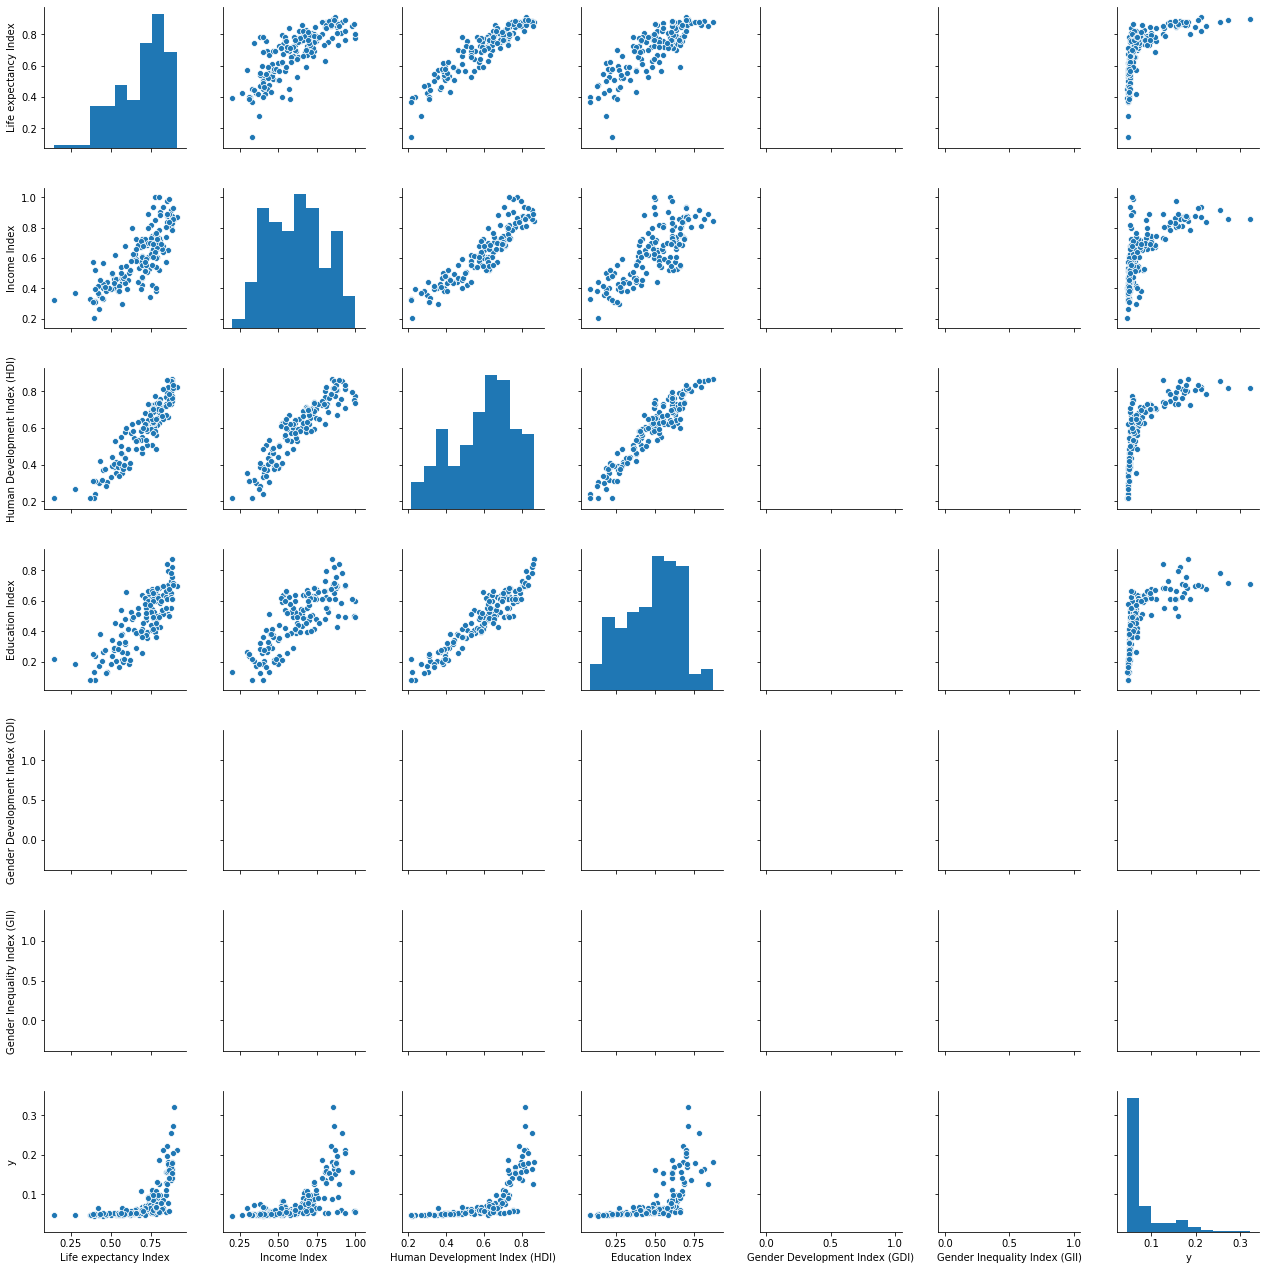

In [196]:
sns.pairplot(data_ind.loc[idx[1991, ], index_columns + ['y']])

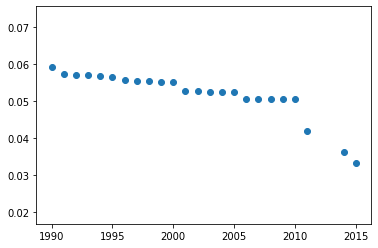

In [189]:
country = 'World'
y = data_ind.loc[idx[:, country], 'y']
x = [x[0] for x in data_ind.loc[idx[:, country], 'y'].index]
plt.scatter(x, y)

Text(0.5, 1.0, 'Life expectancy Index')

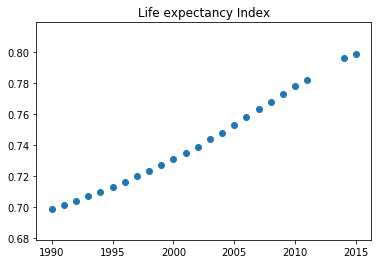

In [190]:
i = 0
y = data_ind.loc[idx[:, country], index_columns[i]]
x = [x[0] for x in data_ind.loc[idx[:, country], index_columns[i]].index]
plt.scatter(x, y)
plt.title(index_columns[i])

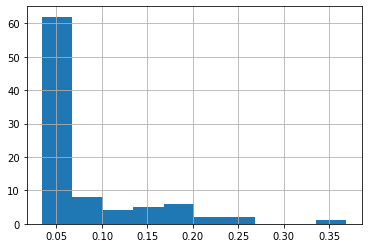

In [184]:
data_ind.loc[idx[2009,:],'y'].hist()

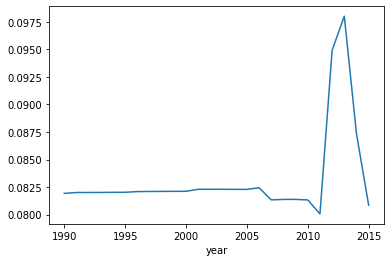

In [40]:
data_ind.groupby(level=0)['y'].mean().plot()

Text(0.5, 1.0, 'Income Index differentiated')

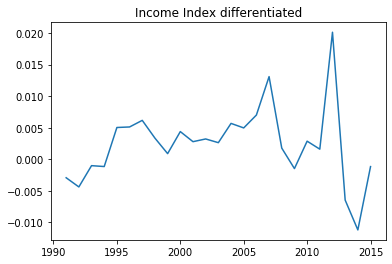

In [52]:
i = 1
a = data_ind.groupby(level=0)[index_columns[i]].mean()
y = [n - p for p,n in zip(a, a[1:])]
plt.plot(a.index[1:], y)
plt.title(index_columns[i]+' differentiated')

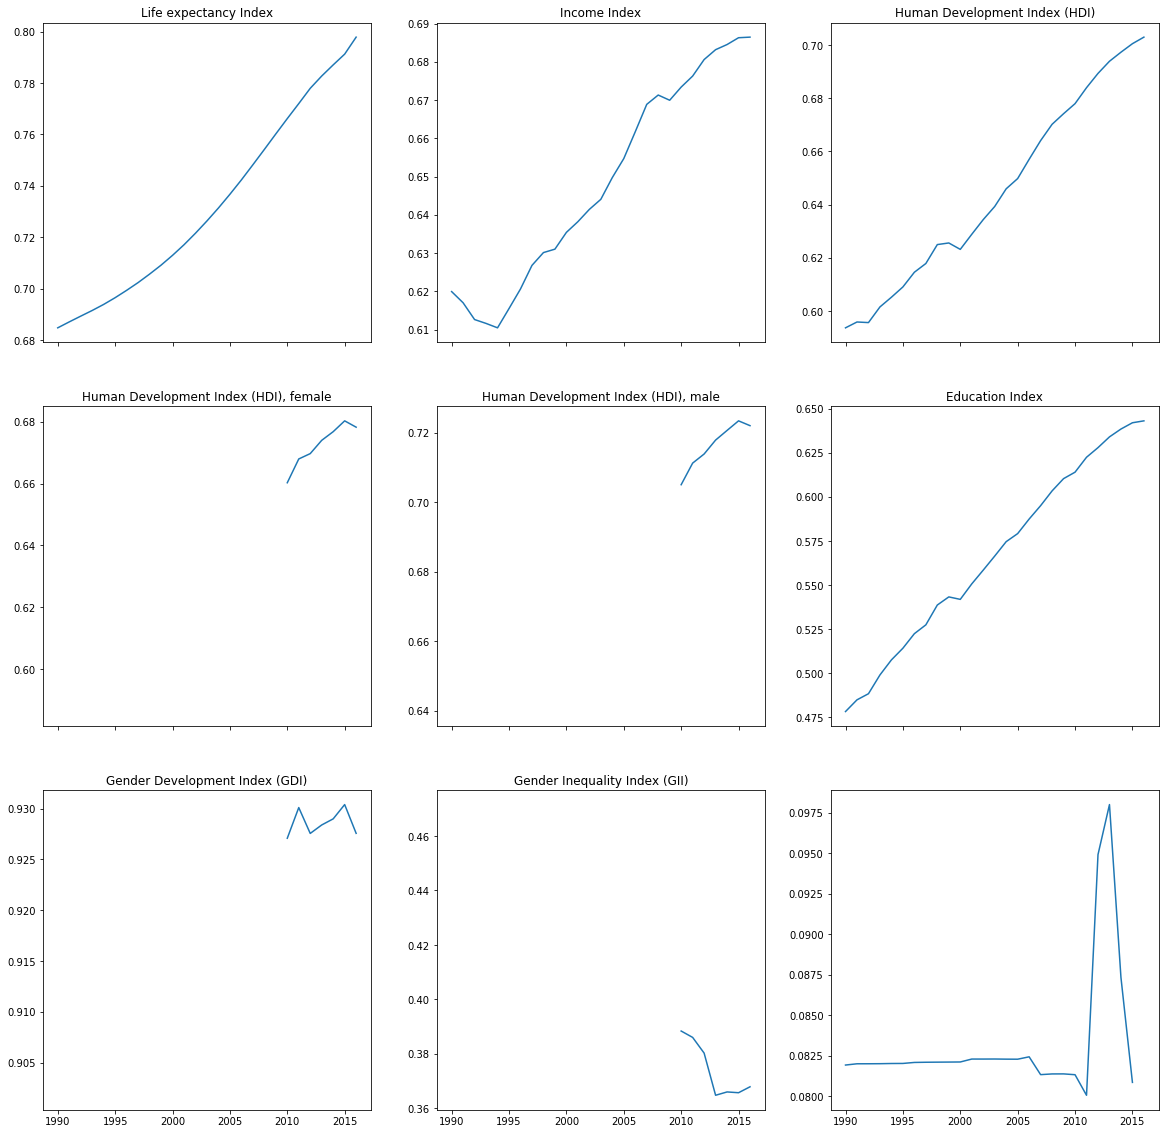

In [76]:
fig, ax = plt.subplots(3,3, figsize=(20,20), sharex=True)
for i in range(len(index_columns)):
    ax[i // 3, i % 3].plot(full_ind.groupby(level=0)[index_columns[i]].mean())
    ax[i // 3, i % 3].set_title(index_columns[i])
ax[2, 2].plot(data_ind.groupby(level=0)['y'].mean())

ValueError: Supply a 'c' argument or a 'color' kwarg but not both; they differ but their functionalities overlap.

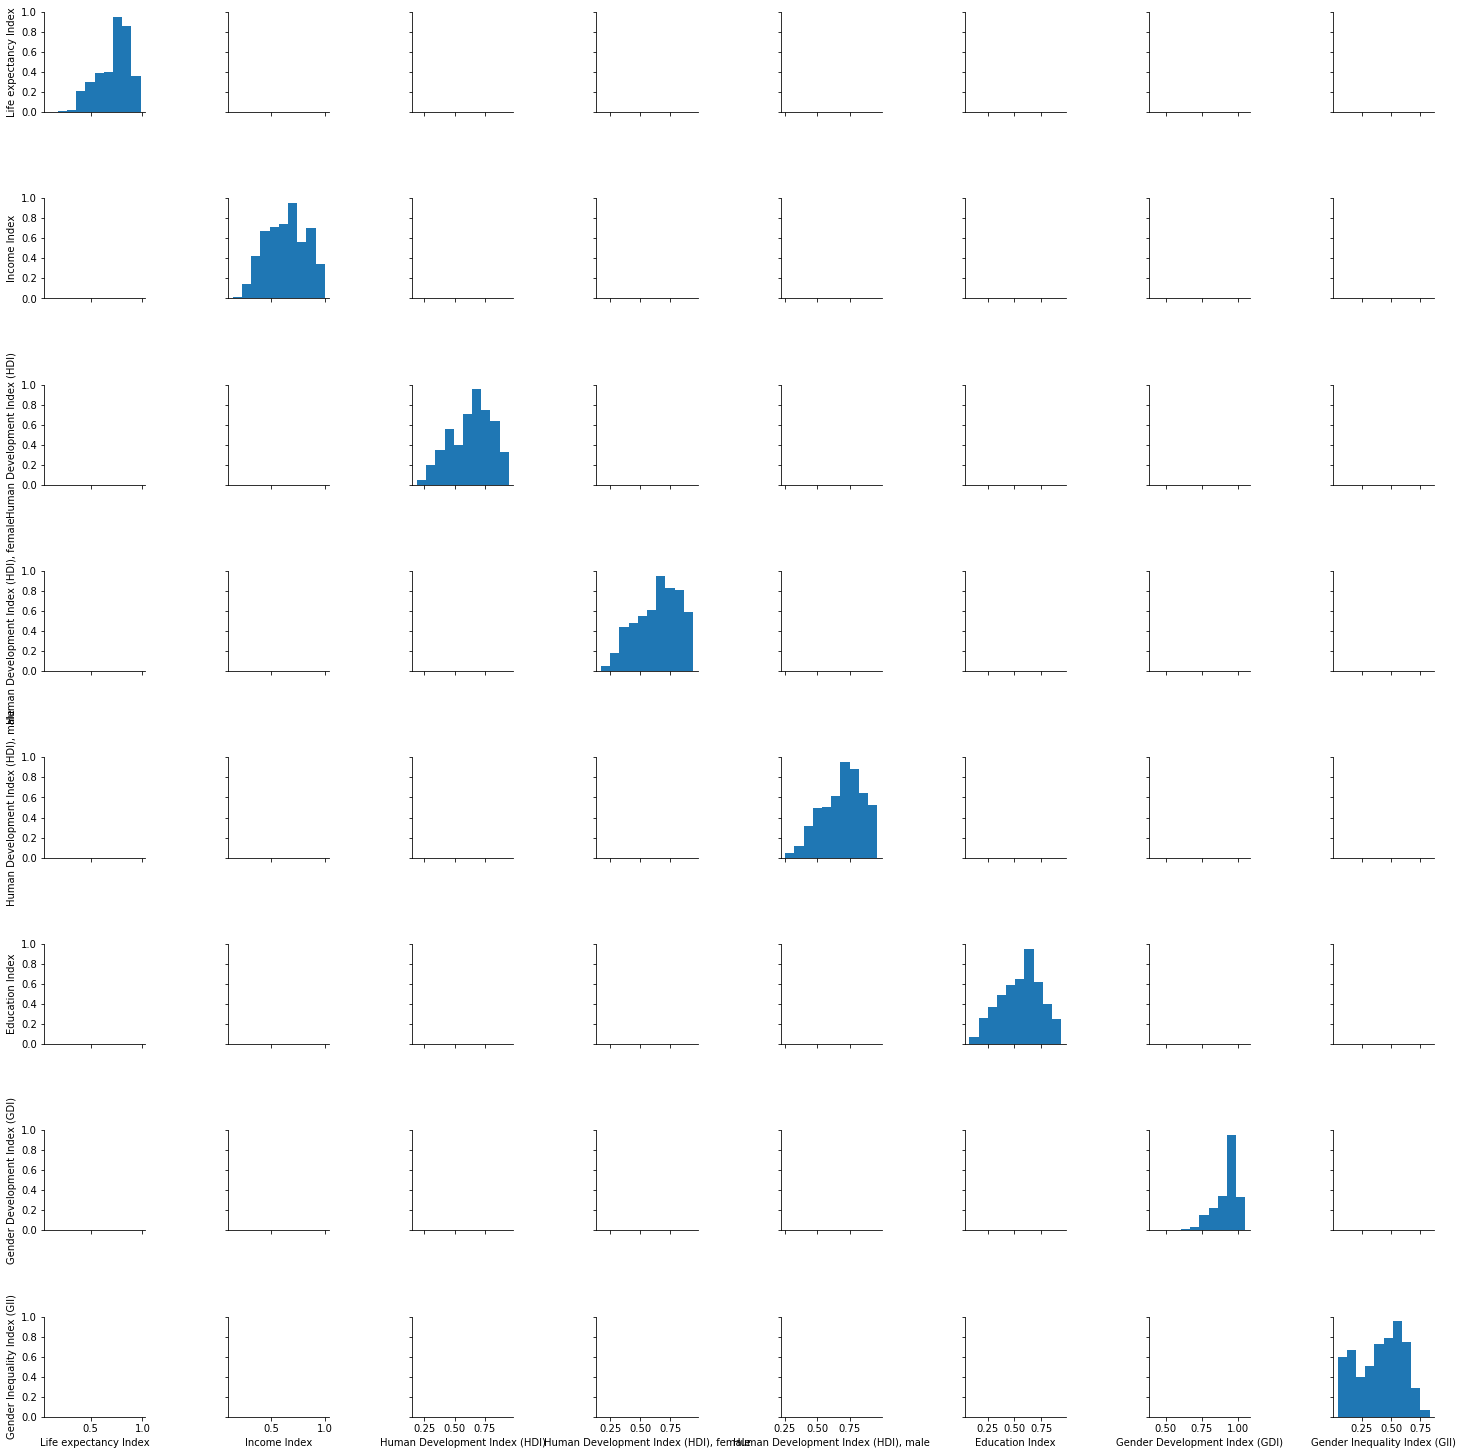

In [139]:
cmap = sns.cubehelix_palette(as_cmap=True, reverse=False)
sns.pairplot(data_ind[index_columns], plot_kws={'c': data_ind['y']})

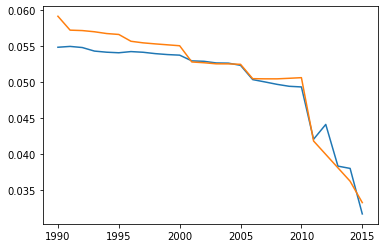

In [71]:
plt.plot(data_no_world.groupby('year')['y'].median() - 0.005)
plt.plot(data[data['country'] == 'World'].loc[:, ['year', 'y']].set_index('year'))

In [32]:
data_no_world = data[data['country'] != 'World']

In [33]:
data_ind_no_world = data_no_world.set_index(['year', 'country'])

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(data_ind_no_world.fillna(value=0).iloc[:, :-1])

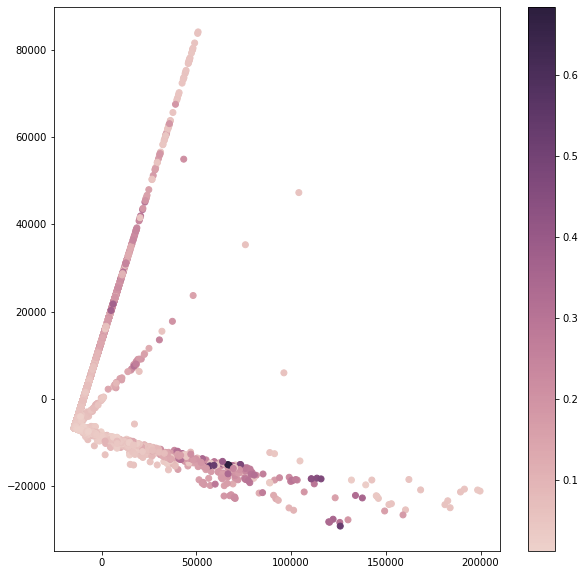

In [36]:
cmap = sns.cubehelix_palette(as_cmap=True, reverse=False)
plt.figure(figsize = (10, 10))
points = plt.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = data_ind_no_world['y'], cmap=cmap)
plt.colorbar(points)


In [48]:
data_2d_pca

array([[-13218.90886215,  -4912.89612404],
       [ -9781.32515952,  -4527.78274697],
       [ -3722.75642601,  -1872.53233217],
       ...,
       [ -2759.53516338,  -8069.03738889],
       [ 16833.76941872, -10525.07759932],
       [ -7198.91690011,  -7492.76392284]])

In [45]:
data_ind_no_world.fillna(value=0).iloc[:, :-1] @ pca.components_.T

0             1
year country                                                        
1990 Afghanistan                           1279.711198   1772.030982
     Albania                               4717.294901   2157.144359
     Algeria                              10775.863635   4812.394774
     Angola                                4700.601706   1831.369546
     Argentina                            11843.455100   5233.786250
...                                                ...           ...
2015 Ukraine                              16276.665278  -2951.671221
     United States                       115818.903756 -18798.713946
     Uzbekistan                           11739.084897  -1384.110283
     Venezuela (Bolivarian Republic of)   31332.389479  -3840.150494
     Zambia                                7299.703161   -807.836817

[3841 rows x 2 columns]

In [29]:
data[data_2d_pca[:, 1] < -20000]#.groupby('country').count()

,year,country,Life expectancy Index,Life expectancy at birth,Gross national income (GNI) per capita (2011 PPP$),Income Index,Expected years of schooling (years),Mean years of schooling (years),Human Development Index (HDI),Education Index,...,"Internet users, total (% of population)",Current health expenditure (% of GDP),"Human Development Index (HDI), female","Human Development Index (HDI), male",Gender Development Index (GDI),Adjusted net savings (% of GNI),"HIV prevalence, adult (% ages 15-49), total",Private capital flows (% of GDP),Gender Inequality Index (GII),y
1077,1995,World,0.713,66.4,9160.0,0.682,9.6,6.5,0.617,0.482,...,NaN,NaN,0.582,0.644,0.905,9.8,0.9,NaN,0.547,0.056656
1977,2000,World,0.731,67.5,10263.0,0.699,10.1,7.1,0.641,0.516,...,NaN,8.6,0.612,0.670,0.913,10.2,1.1,-1.0,0.521,0.055087
2877,2005,World,0.753,68.9,11621.0,0.718,11.0,7.5,0.669,0.553,...,NaN,9.3,0.639,0.694,0.921,9.9,1.1,-1.7,0.493,0.052507
3419,2010,World,0.778,70.5,13104.0,0.736,11.8,7.9,0.697,0.592,...,NaN,9.6,0.671,0.720,0.932,9.6,1.1,-2.1,0.473,0.050656
3509,2011,World,0.782,70.9,13471.0,0.740,12.1,8.0,0.703,0.600,...,NaN,9.5,0.678,0.726,0.934,10.1,1.0,-2.1,0.467,0.041859
3776,2014,World,0.796,71.7,14402.0,0.751,12.5,8.2,0.718,0.620,...,NaN,9.6,0.695,0.739,0.940,10.9,1.0,-0.4,0.454,0.036274
3863,2015,World,0.799,72.0,14709.0,0.754,12.5,8.3,0.722,0.626,...,NaN,9.9,0.699,0.743,0.940,11.1,1.0,-0.2,0.449,0.033304


In [132]:
from sklearn import manifold
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(data_ind.fillna(value=0).loc[:, index_columns])

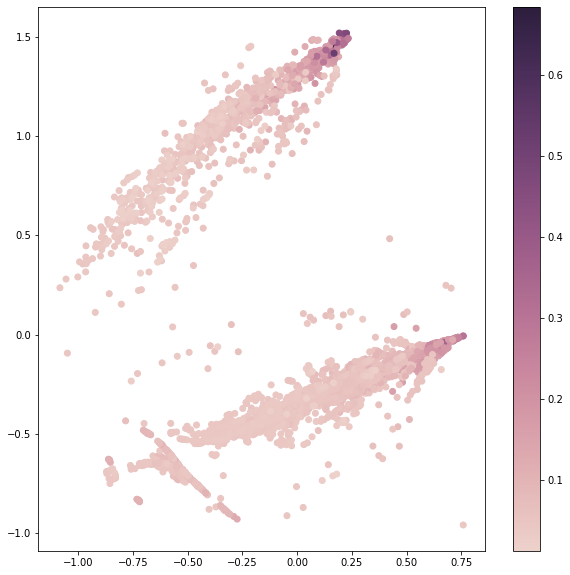

In [133]:
cmap = sns.cubehelix_palette(as_cmap=True, reverse=False)
plt.figure(figsize = (10, 10))
points = plt.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = data_ind['y'], cmap=cmap)
plt.colorbar(points)

In [27]:
full_ind.corr(method='spearman')

,Life expectancy Index,Life expectancy at birth,Gross national income (GNI) per capita (2011 PPP$),Income Index,Expected years of schooling (years),Mean years of schooling (years),Human Development Index (HDI),Education Index,Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),...,"Internet users, total (% of population)",Current health expenditure (% of GDP),"Human Development Index (HDI), female","Human Development Index (HDI), male",Gender Development Index (GDI),Adjusted net savings (% of GNI),"HIV prevalence, adult (% ages 15-49), total",Private capital flows (% of GDP),Gender Inequality Index (GII),y
Life expectancy Index,1.000000,0.999990,0.830331,0.830365,0.837100,0.742214,0.923844,0.811091,0.864089,0.856020,...,0.812099,0.409140,0.904162,0.931152,0.538912,0.327901,-0.592005,0.097422,-0.856769,0.757707
Life expectancy at birth,0.999990,1.000000,0.830362,0.830396,0.837071,0.742127,0.923828,0.811040,0.864082,0.856041,...,0.812178,0.409186,0.904139,0.931156,0.538843,0.327795,-0.591891,0.097087,-0.856704,0.757582
Gross national income (GNI) per capita (2011 PPP$),0.830331,0.830362,1.000000,0.999993,0.816687,0.741840,0.936966,0.799328,0.858672,0.862050,...,0.802433,0.241251,0.934189,0.950225,0.608362,0.349151,-0.455285,0.229305,-0.819122,0.683687
Income Index,0.830365,0.830396,0.999993,1.000000,0.816853,0.741875,0.937020,0.799430,0.858727,0.862004,...,0.802580,0.241316,0.934276,0.950312,0.608447,0.349095,-0.455252,0.229221,-0.819405,0.683731
Expected years of schooling (years),0.837100,0.837071,0.816687,0.816853,1.000000,0.844007,0.929874,0.945521,0.835328,0.819200,...,0.804801,0.427919,0.936289,0.926476,0.676096,0.221219,-0.417422,0.107070,-0.869992,0.668750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Adjusted net savings (% of GNI),0.327901,0.327795,0.349151,0.349095,0.221219,0.222471,0.315485,0.224198,0.327475,0.286219,...,0.288827,-0.092849,0.308664,0.320439,0.208296,1.000000,-0.228309,0.177755,-0.228518,0.235944
"HIV prevalence, adult (% ages 15-49), total",-0.592005,-0.591891,-0.455285,-0.455252,-0.417422,-0.455666,-0.527204,-0.456099,-0.585294,-0.606990,...,-0.428209,-0.126278,-0.523956,-0.583674,-0.213662,-0.228309,1.000000,-0.073153,0.539210,-0.616425
Private capital flows (% of GDP),0.097422,0.097087,0.229305,0.229221,0.107070,0.055648,0.150102,0.081401,0.148332,0.182605,...,0.119030,-0.021020,0.162264,0.191356,0.000776,0.177755,-0.073153,1.000000,-0.152065,0.153521
Gender Inequality Index (GII),-0.856769,-0.856704,-0.819122,-0.819405,-0.869992,-0.841899,-0.908858,-0.891403,-0.807258,-0.842242,...,-0.812202,-0.442917,-0.922726,-0.898753,-0.660397,-0.228518,0.539210,-0.152065,1.000000,-0.779382


In [46]:
data.corrwith(data['y'], method='pearson', axis=0).abs().sort_values()[:40:-1]

y                                                                                  1.000000
Gender Inequality Index (GII)                                                      0.748658
Old age dependency ratio (old age (65 and older) per 100 people (ages 15-64))      0.726805
Estimated gross national income per capita, female (2011 PPP$)                     0.705615
Internet users, total (% of population)                                            0.681635
Human Development Index (HDI)                                                      0.660279
Human Development Index (HDI), male                                                0.657131
Human Development Index (HDI), female                                              0.648513
Education Index                                                                    0.637161
Expected years of schooling (years)                                                0.612789
Income Index                                                                    

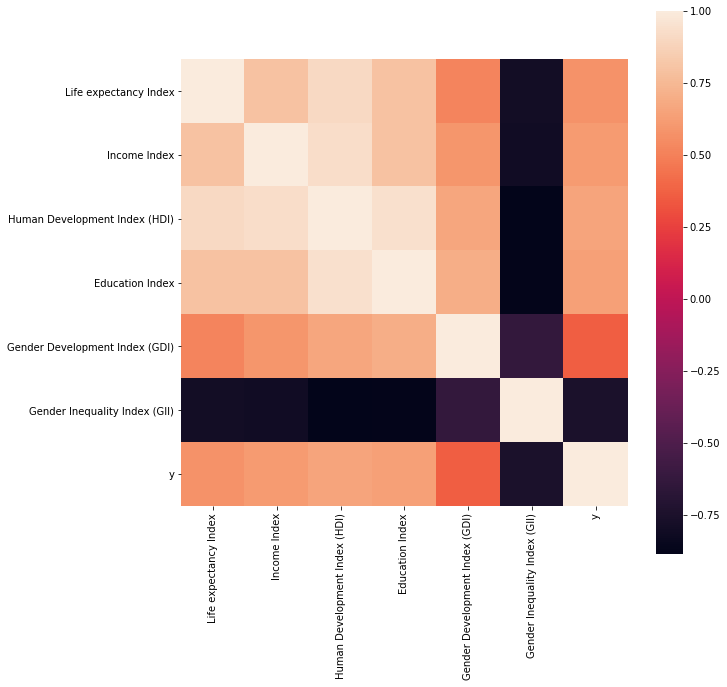

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(full_ind[index_columns+['y']].corr(method='pearson'), square=True)

In [53]:
data.columns[np.argsort(XGB.feature_importances_)[::-1] + 2]

NameError: name 'XGB' is not defined

In [92]:
test[test['country'] == 'Russian Federation']

,year,country,Life expectancy Index,Life expectancy at birth,Gross national income (GNI) per capita (2011 PPP$),Income Index,Expected years of schooling (years),Mean years of schooling (years),Human Development Index (HDI),Education Index,...,Mobile phone subscriptions (per 100 people),"Internet users, total (% of population)",Current health expenditure (% of GDP),"Human Development Index (HDI), female","Human Development Index (HDI), male",Gender Development Index (GDI),Adjusted net savings (% of GNI),"HIV prevalence, adult (% ages 15-49), total",Private capital flows (% of GDP),Gender Inequality Index (GII)
199,2015,Russian Federation,0.792,71.5,24032.0,0.828,15.4,11.8,0.813,0.821,...,156.8,70.1,5.3,0.819,0.805,1.017,9.4,1.0,3.1,0.280
215,2007,Russian Federation,0.720,66.8,22542.0,0.818,13.9,11.4,0.767,0.767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,2011,Russian Federation,0.759,69.3,23594.0,0.825,14.3,11.5,0.789,0.783,...,141.8,49.0,4.8,0.800,0.776,1.031,12.1,0.7,1.3,0.311
306,2014,Russian Federation,0.785,71.0,24465.0,0.831,15.0,11.7,0.807,0.806,...,152.8,70.5,5.2,0.814,0.798,1.019,7.8,0.9,3.6,0.294
339,2008,Russian Federation,0.730,67.4,23557.0,0.825,14.0,11.4,0.774,0.770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475,2010,Russian Federation,0.749,68.7,22647.0,0.819,14.0,11.5,0.780,0.772,...,165.7,43.0,5.0,0.792,0.767,1.033,9.0,0.6,0.7,0.316
591,2009,Russian Federation,0.740,68.1,21688.0,0.813,13.7,11.5,0.771,0.763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755,2016,Russian Federation,0.797,71.8,24096.0,0.828,15.5,11.8,0.817,0.826,...,157.7,73.1,5.3,0.823,0.810,1.016,8.1,1.1,-1.0,0.278


In [112]:
data[~data['Gender Inequality Index (GII)'].isna()]

,year,country,Life expectancy Index,Life expectancy at birth,Gross national income (GNI) per capita (2011 PPP$),Income Index,Expected years of schooling (years),Mean years of schooling (years),Human Development Index (HDI),Education Index,...,"Internet users, total (% of population)",Current health expenditure (% of GDP),"Human Development Index (HDI), female","Human Development Index (HDI), male",Gender Development Index (GDI),Adjusted net savings (% of GNI),"HIV prevalence, adult (% ages 15-49), total",Private capital flows (% of GDP),Gender Inequality Index (GII),y
903,1995,Algeria,0.747,68.5,8904.0,0.678,9.8,4.7,0.602,0.431,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,0.679,0.062969
905,1995,Argentina,0.810,72.7,13742.0,0.744,13.3,8.3,0.731,0.648,...,NaN,NaN,0.721,0.733,0.984,10.7,0.3,-2.5,0.418,0.073946
906,1995,Armenia,0.753,68.9,2167.0,0.465,10.2,10.4,0.604,0.631,...,NaN,NaN,0.592,0.613,0.965,NaN,0.1,NaN,0.474,0.081598
907,1995,Australia,0.896,78.3,29524.0,0.859,18.8,11.8,0.883,0.894,...,NaN,NaN,0.860,0.892,0.964,7.1,0.1,-5.9,0.180,0.185944
908,1995,Austria,0.874,76.8,33659.0,0.879,14.9,8.9,0.817,0.709,...,NaN,NaN,0.788,0.842,0.935,NaN,0.1,NaN,0.186,0.184452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,2015,United States,0.906,78.9,54039.0,0.950,16.2,13.3,0.917,0.894,...,74.6,16.8,0.915,0.921,0.993,7.5,NaN,-1.4,0.219,0.100069
3861,2015,Uzbekistan,0.784,70.9,5759.0,0.612,11.7,11.4,0.696,0.704,...,42.8,6.1,0.672,0.715,0.940,NaN,0.2,NaN,0.303,0.037598
3862,2015,Venezuela (Bolivarian Republic of),0.809,72.6,15101.0,0.758,14.0,10.1,0.763,0.724,...,64.0,5.1,0.769,0.753,1.021,NaN,NaN,NaN,0.470,0.046967
3863,2015,World,0.799,72.0,14709.0,0.754,12.5,8.3,0.722,0.626,...,NaN,9.9,0.699,0.743,0.940,11.1,1.0,-0.2,0.449,0.033304


In [105]:
(data.count()/3865).sort_values()[::-1]

y                                                                                          1.000000
country                                                                                    1.000000
year                                                                                       1.000000
Life expectancy Index                                                                      0.999741
Life expectancy at birth                                                                   0.999741
Gross national income (GNI) per capita (2011 PPP$)                                         0.992755
Income Index                                                                               0.992755
Expected years of schooling (years)                                                        0.965589
Mean years of schooling (years)                                                            0.906080
Education Index                                                                            0.898836


In [89]:
data[data['country'] == 'Russian Federation'].set_index('year')['y']#.plot()

year
1990    0.090877
1991    0.089689
1992    0.088438
1993    0.087770
1994    0.087143
1995    0.086910
1996    0.086413
1997    0.086321
1998    0.086148
1999    0.086174
2000    0.086498
2001    0.086675
2002    0.086689
2003    0.086730
2004    0.086731
2005    0.086638
2006    0.089057
2012    0.088728
2013    0.068819
Name: y, dtype: float64

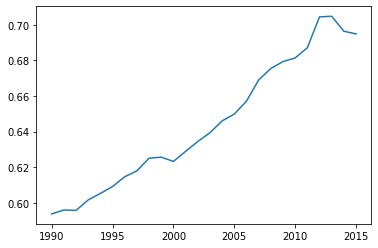

In [22]:
y = data_ind.groupby(level=0)['Human Development Index (HDI)'].mean()
plt.plot(y)

In [17]:
a = index_columns[2:-1]

In [31]:
list(enumerate(index_columns))

[(0, 'year'),
 (1, 'country'),
 (2, 'Life expectancy Index'),
 (3, 'Income Index'),
 (4, 'Human Development Index (HDI)'),
 (5, 'Education Index'),
 (6, 'Gender Development Index (GDI)'),
 (7, 'Gender Inequality Index (GII)'),
 (8, 'Population using at least basic drinking-water services (%)'),
 (9, 'Population using at least basic sanitation services (%)'),
 (10,
  'Old age dependency ratio (old age (65 and older) per 100 people (ages 15-64))'),
 (11, 'Gross capital formation (% of GDP)'),
 (12, 'y')]

In [62]:
import math

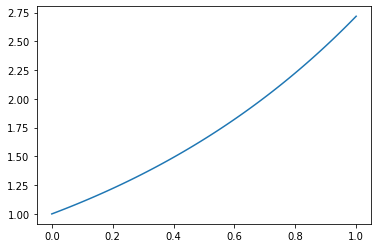

In [83]:
x = np.linspace(0, 1, 100)
y = np.exp(x)
plt.plot(x, y)

In [ ]:
data[index_columns][index_columns[i]] ** data[index_columns][index_columns[i]]

In [115]:
full.groupby('country').mean()

,year,Life expectancy Index,Life expectancy at birth,Gross national income (GNI) per capita (2011 PPP$),Income Index,Expected years of schooling (years),Mean years of schooling (years),Human Development Index (HDI),Education Index,Population using at least basic drinking-water services (%),...,"Internet users, total (% of population)",Current health expenditure (% of GDP),"Human Development Index (HDI), female","Human Development Index (HDI), male",Gender Development Index (GDI),Adjusted net savings (% of GNI),"HIV prevalence, adult (% ages 15-49), total",Private capital flows (% of GDP),Gender Inequality Index (GII),y
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2002.5,0.570654,57.096154,1356.769231,0.387962,6.788462,2.480769,0.387346,0.271308,42.875000,...,5.271429,9.057143,0.348000,0.523125,0.656875,-3.700000,NaN,-0.233333,0.643857,0.044122
Albania,2003.0,0.841667,74.703704,7003.444444,0.628444,12.014815,8.907407,0.693185,0.631074,88.588235,...,44.644444,6.244444,0.719000,0.751100,0.956400,9.836364,0.100000,-7.088889,0.284000,0.079259
Algeria,2002.5,0.796077,71.734615,10959.423077,0.707846,11.788462,6.080769,0.667231,0.530000,91.687500,...,17.762500,5.325000,0.631000,0.758750,0.830875,22.550000,0.100000,-1.600000,0.516889,0.060402
Angola,2003.0,0.466778,50.344444,4291.666667,0.556000,6.659259,4.622222,0.482389,0.379889,48.470588,...,6.455556,2.877778,0.525000,0.611333,0.859333,-22.177778,1.463636,1.875000,0.574667,0.042614
Argentina,2002.5,0.830115,73.961538,15362.884615,0.758462,15.446154,9.296154,0.774385,0.739000,97.812500,...,46.137500,8.350000,0.791778,0.801444,0.988111,7.410000,0.340000,-1.850000,0.379000,0.073062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,2003.0,0.821741,73.407407,3203.888889,0.511333,10.762963,6.081481,0.594148,0.502222,86.941176,...,32.555556,5.733333,0.637300,0.645000,0.986800,17.733333,0.327273,-5.600000,0.334200,0.066898
World,2002.5,0.744846,68.419231,11187.269231,0.710115,10.684615,7.188462,0.656692,0.536192,84.750000,...,NaN,9.437500,0.661111,0.711222,0.929000,10.140000,0.960000,-1.287500,0.480444,0.052014
Yemen,2003.0,0.649481,62.218519,3002.296296,0.510148,8.174074,1.677778,0.453370,0.282741,50.058824,...,15.222222,5.122222,0.337500,0.551000,0.611700,NaN,NaN,0.642857,0.826556,0.044866


In [127]:
data.iloc[:, 1:]

,country,Life expectancy Index,Life expectancy at birth,Gross national income (GNI) per capita (2011 PPP$),Income Index,Expected years of schooling (years),Mean years of schooling (years),Human Development Index (HDI),Education Index,Population using at least basic drinking-water services (%),...,"Internet users, total (% of population)",Current health expenditure (% of GDP),"Human Development Index (HDI), female","Human Development Index (HDI), male",Gender Development Index (GDI),Adjusted net savings (% of GNI),"HIV prevalence, adult (% ages 15-49), total",Private capital flows (% of GDP),Gender Inequality Index (GII),y
0,Afghanistan,0.467,50.3,2193.0,0.466,2.6,1.5,0.298,0.122,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050220
1,Albania,0.797,71.8,4415.0,0.572,11.6,7.8,0.644,0.584,NaN,...,NaN,NaN,NaN,NaN,NaN,2.3,0.1,NaN,NaN,0.082286
2,Algeria,0.722,66.9,9989.0,0.695,9.6,3.6,0.578,0.385,NaN,...,NaN,NaN,NaN,NaN,NaN,9.0,0.1,NaN,NaN,0.064073
3,Angola,0.389,45.3,4139.0,0.562,3.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,NaN,0.049559
4,Argentina,0.794,71.6,10932.0,0.709,13.2,7.9,0.707,0.628,NaN,...,NaN,NaN,NaN,NaN,NaN,6.6,0.1,-0.4,NaN,0.074967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,United States,0.906,78.9,54039.0,0.950,16.2,13.3,0.917,0.894,99.0,...,74.6,16.8,0.915,0.921,0.993,7.5,NaN,-1.4,0.219,0.100069
3861,Uzbekistan,0.784,70.9,5759.0,0.612,11.7,11.4,0.696,0.704,98.0,...,42.8,6.1,0.672,0.715,0.940,NaN,0.2,NaN,0.303,0.037598
3862,Venezuela (Bolivarian Republic of),0.809,72.6,15101.0,0.758,14.0,10.1,0.763,0.724,96.0,...,64.0,5.1,0.769,0.753,1.021,NaN,NaN,NaN,0.470,0.046967
3863,World,0.799,72.0,14709.0,0.754,12.5,8.3,0.722,0.626,89.0,...,NaN,9.9,0.699,0.743,0.940,11.1,1.0,-0.2,0.449,0.033304


In [109]:
data.values

array([[1990, 'Afghanistan', 0.467, ..., nan, nan, 0.05022043090917161],
       [1990, 'Albania', 0.797, ..., nan, nan, 0.08228648980143816],
       [1990, 'Algeria', 0.722, ..., nan, nan, 0.06407256761832436],
       ...,
       [2015, 'Venezuela (Bolivarian Republic of)', 0.809, ..., nan,
        0.47, 0.04696662033272847],
       [2015, 'World', 0.799, ..., -0.2, 0.449, 0.033303632673714945],
       [2015, 'Zambia', 0.642, ..., -13.9, 0.5710000000000001,
        0.019507507385986056]], dtype=object)

In [148]:
index_columns

['year',
 'country',
 'Life expectancy Index',
 'Income Index',
 'Human Development Index (HDI)',
 'HDI Rank',
 'Education Index',
 'Gender Development Index (GDI)',
 'Gender Inequality Index (GII)',
 'Population using at least basic drinking-water services (%)',
 'Population using at least basic sanitation services (%)',
 'Old age dependency ratio (old age (65 and older) per 100 people (ages 15-64))',
 'Gross capital formation (% of GDP)',
 'y']

Text(0.5, 1.0, 'HDI Rank')

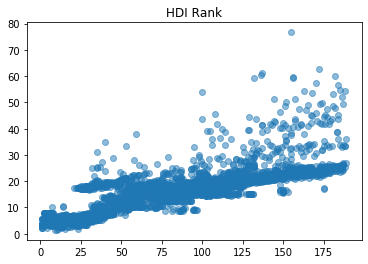

In [162]:
i = 5
plt.scatter(data[index_columns][index_columns[i]],
#             data[index_columns][index_columns[i + 1]] +
#             data[index_columns][index_columns[i + 1]],
            1/data[index_columns]['y'],
            alpha=0.5)
plt.title(index_columns[i])

In [86]:
data[data['y'] > 0.4]

,year,country,Life expectancy Index,Life expectancy at birth,Gross national income (GNI) per capita (2011 PPP$),Income Index,Expected years of schooling (years),Mean years of schooling (years),Human Development Index (HDI),Education Index,...,"Internet users, total (% of population)",Current health expenditure (% of GDP),"Human Development Index (HDI), female","Human Development Index (HDI), male",Gender Development Index (GDI),Adjusted net savings (% of GNI),"HIV prevalence, adult (% ages 15-49), total",Private capital flows (% of GDP),Gender Inequality Index (GII),y
3456,2011,Iceland,0.953,82.0,34552.0,0.883,18.5,11.0,0.901,0.868,...,94.8,8.5,0.888,0.905,0.982,-4.5,NaN,-7.4,0.098,0.550484
3546,2012,Iceland,0.955,82.1,35944.0,0.889,18.8,11.5,0.908,0.883,...,96.2,8.4,0.897,0.916,0.979,-1.5,NaN,-32.0,0.093,0.526677
3587,2012,Sweden,0.951,81.8,44360.0,0.921,15.8,12.4,0.908,0.854,...,93.2,10.9,0.907,0.907,1.000,17.6,NaN,-0.6,0.048,0.433914
3635,2013,Iceland,0.957,82.2,40400.0,0.907,19.5,11.9,0.920,0.898,...,96.5,8.5,0.909,0.930,0.978,8.8,NaN,7.3,0.088,0.683813
3659,2013,Norway,0.949,81.7,63573.0,0.975,17.7,12.7,0.946,0.915,...,95.1,8.9,0.941,0.946,0.994,21.7,0.1,13.7,0.062,0.439572
3676,2013,Sweden,0.954,82.0,44514.0,0.921,18.1,12.2,0.927,0.907,...,94.8,11.1,0.918,0.928,0.988,17.4,NaN,-3.8,0.047,0.477482
3724,2014,Iceland,0.959,82.4,40701.0,0.908,19.6,12.2,0.924,0.906,...,98.2,8.5,0.909,0.941,0.967,9.7,NaN,-10.5,0.083,0.676833
3748,2014,Norway,0.951,81.8,65438.0,0.979,17.7,12.5,0.945,0.907,...,96.3,9.3,0.940,0.946,0.994,21.7,0.1,8.1,0.058,0.452224
3824,2015,Luxembourg,0.948,81.6,62935.0,0.974,14.0,12.0,0.899,0.788,...,96.4,6.2,0.883,0.912,0.968,18.1,0.2,-121.0,0.077,0.525346
3836,2015,Norway,0.953,81.9,66584.0,0.982,17.8,12.5,0.948,0.912,...,96.8,10.1,0.942,0.949,0.993,19.2,0.1,13.0,0.054,0.473119


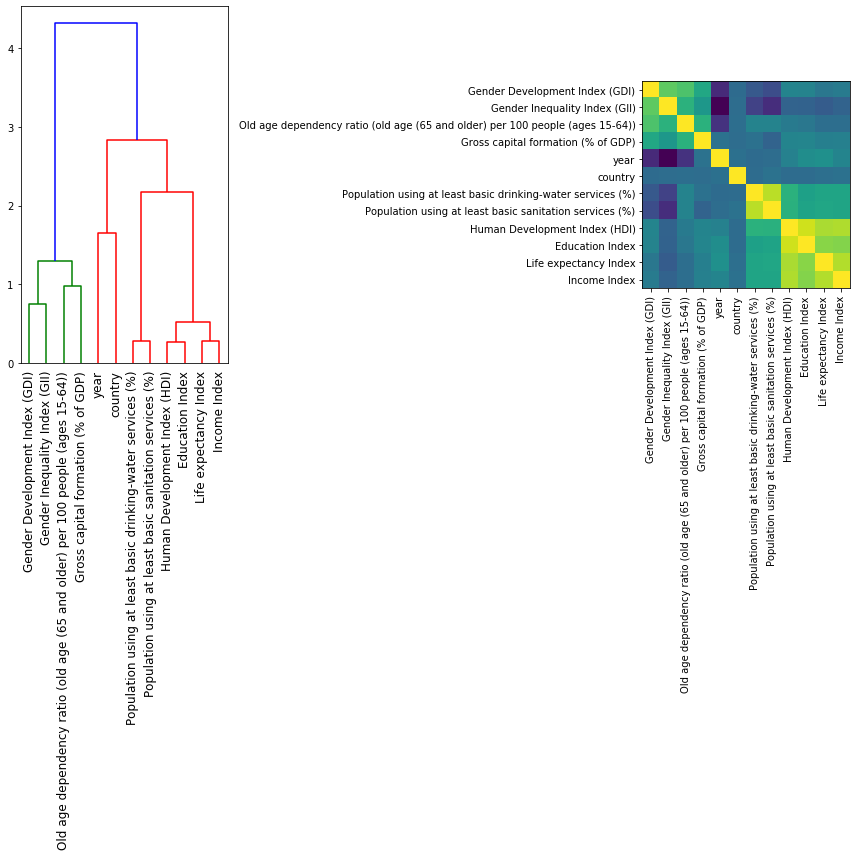

In [20]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
X = data[index_columns[:-1]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
corr = spearmanr(X).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=X.columns, ax=ax1,
                              leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()